In [4]:
import pandas as pd

# Load CSV
df = pd.read_csv(r"C:\Users\kshar\Downloads\important.csv")

#Show first few rows
df.head()


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [9]:
# Overview of the dataset
df.info()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

In [10]:

# Check for nulls
df.isnull().sum()


bytes_in               0
bytes_out              0
creation_time          0
end_time               0
src_ip                 0
src_ip_country_code    0
protocol               0
response.code          0
dst_port               0
dst_ip                 0
rule_names             0
observation_name       0
source.meta            0
source.name            0
time                   0
detection_types        0
dtype: int64

In [13]:
# Summary statistics
df.describe()


,bytes_in,bytes_out,response.code,dst_port
count,2.820000e+02,2.820000e+02,282.0,282.0
mean,1.199390e+06,8.455429e+04,200.0,443.0
std,4.149312e+06,2.549279e+05,0.0,0.0
min,4.000000e+01,4.400000e+01,200.0,443.0
25%,5.381500e+03,1.114200e+04,200.0,443.0
50%,1.318200e+04,1.379950e+04,200.0,443.0
75%,3.083300e+04,2.627950e+04,200.0,443.0
max,2.520779e+07,1.561220e+06,200.0,443.0


In [14]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\kshar\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


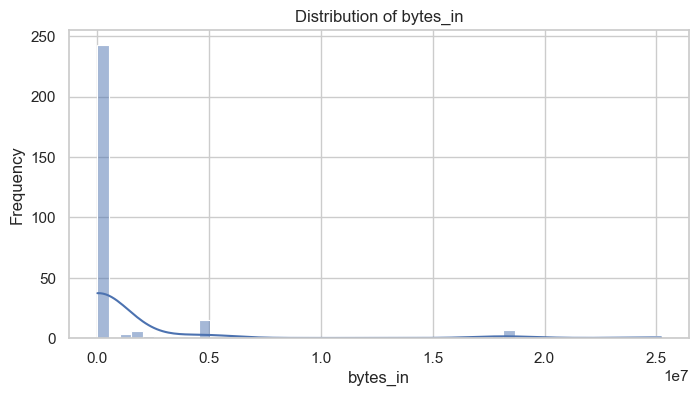

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Histogram for bytes_in
plt.figure(figsize=(8, 4))
sns.histplot(df['bytes_in'], bins=50, kde=True)
plt.title("Distribution of bytes_in")
plt.xlabel("bytes_in")
plt.ylabel("Frequency")
plt.show()




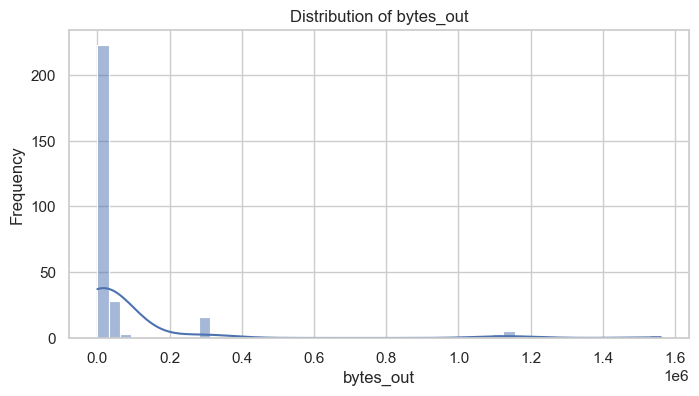

In [17]:
# Histogram for bytes_out
plt.figure(figsize=(8, 4))
sns.histplot(df['bytes_out'], bins=50, kde=True)
plt.title("Distribution of bytes_out")
plt.xlabel("bytes_out")
plt.ylabel("Frequency")
plt.show()

protocol
HTTPS    282
Name: count, dtype: int64
dst_port
443    282
Name: count, dtype: int64
observation_name
Adversary Infrastructure Interaction    282
Name: count, dtype: int64


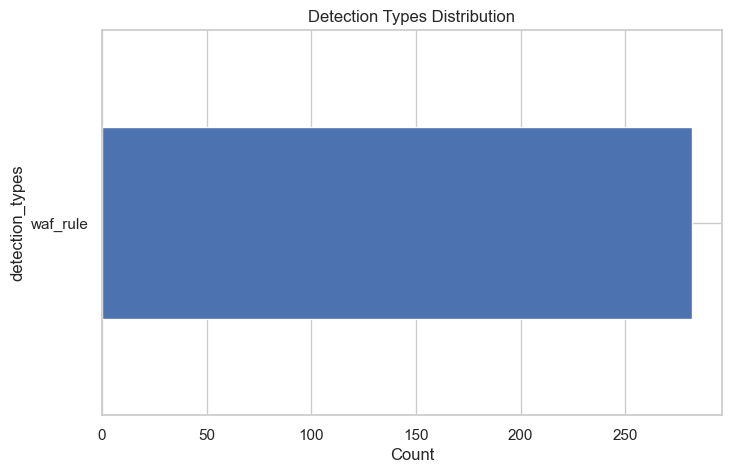

In [18]:
# Count of different protocols
print(df['protocol'].value_counts())

# Count of top 10 ports
print(df['dst_port'].value_counts().head(10))

# Check for frequent observation names
print(df['observation_name'].value_counts().head(10))

# Plot detection_types if multiple values are comma-separated
df['detection_types'].str.split(',').explode().value_counts().plot(kind='barh', figsize=(8,5), title="Detection Types Distribution")
plt.xlabel("Count")
plt.show()


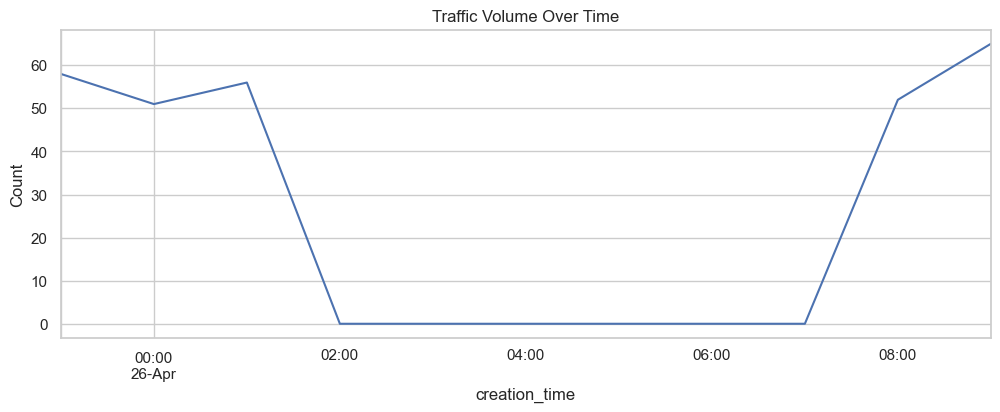

In [20]:
# Convert time columns to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')

# Plot how many records per hour
df.set_index('creation_time').resample('h').size().plot(figsize=(12, 4), title="Traffic Volume Over Time")
plt.ylabel("Count")
plt.show()


In [21]:
df['bytes_in'].equals(df['bytes_out'])  # Are they exactly the same?
df[['bytes_in', 'bytes_out']].corr()    # How correlated are they?


,bytes_in,bytes_out
bytes_in,1.000000,0.997705
bytes_out,0.997705,1.000000


In [24]:
def generate_traffic_features(df):
    df['bytes_ratio'] = df['bytes_out'] / (df['bytes_in'] + 1e-5)
    df['bytes_diff'] = abs(df['bytes_out'] - df['bytes_in'])
    return df
    

In [25]:
generate_traffic_features(df)

,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types,bytes_ratio,bytes_diff
0,5602,12990,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule,2.318815,7388
1,30912,18186,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule,0.588315,12726
2,28506,13468,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule,0.472462,15038
3,30546,14278,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule,0.467426,16268
4,6526,13892,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule,2.128716,7366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,41336,13180,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,136.226.77.103,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule,0.318850,28156
278,3638,3190,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.26.101,DE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule,0.876855,448
279,25207794,1561220,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,155.91.45.242,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule,0.061934,23646574
280,5736,12114,2024-04-26 09:50:00+00:00,2024-04-26 10:00:00+00:00,165.225.209.4,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-26T09:50:00Z,waf_rule,2.111925,6378


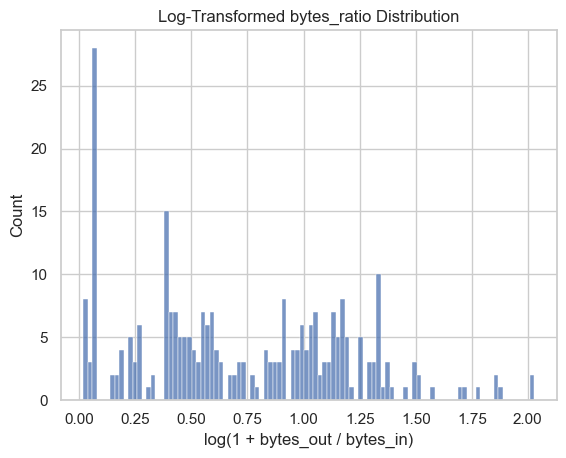

In [28]:
import numpy as np

df['log_bytes_ratio'] = np.log1p(df['bytes_ratio'])

sns.histplot(df['log_bytes_ratio'], bins=100)
plt.title("Log-Transformed bytes_ratio Distribution")
plt.xlabel("log(1 + bytes_out / bytes_in)")
plt.show()


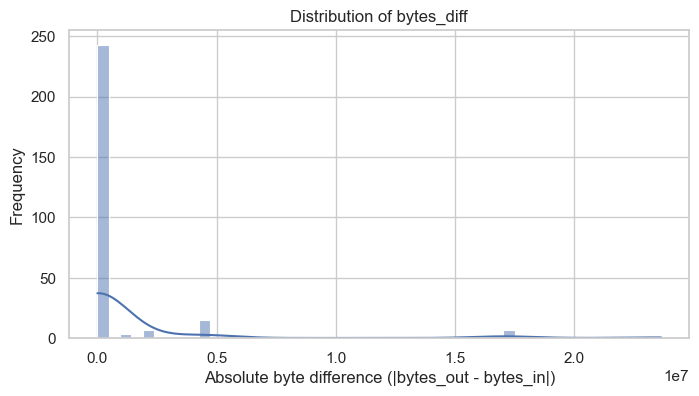

In [27]:
plt.figure(figsize=(8, 4))
sns.histplot(df['bytes_diff'], bins=50, kde=True)
plt.title("Distribution of bytes_diff")
plt.xlabel("Absolute byte difference (|bytes_out - bytes_in|)")
plt.ylabel("Frequency")
plt.show()


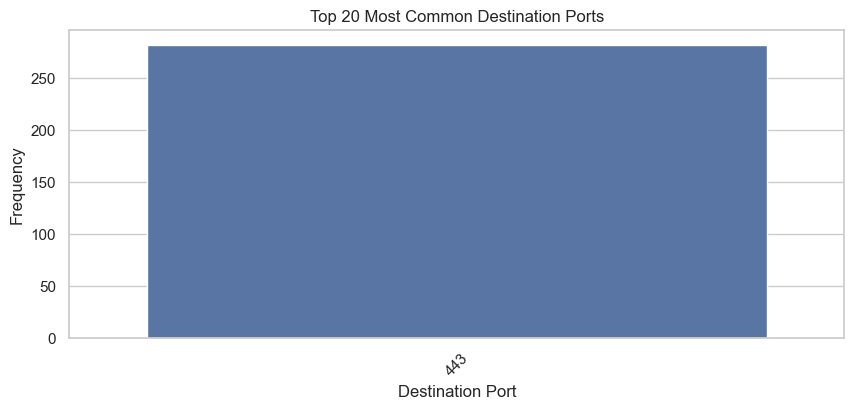

In [29]:


# Top 20 most frequent destination ports
top_ports = df['dst_port'].value_counts().head(20)

plt.figure(figsize=(10, 4))
sns.barplot(x=top_ports.index, y=top_ports.values)
plt.title("Top 20 Most Common Destination Ports")
plt.xlabel("Destination Port")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()


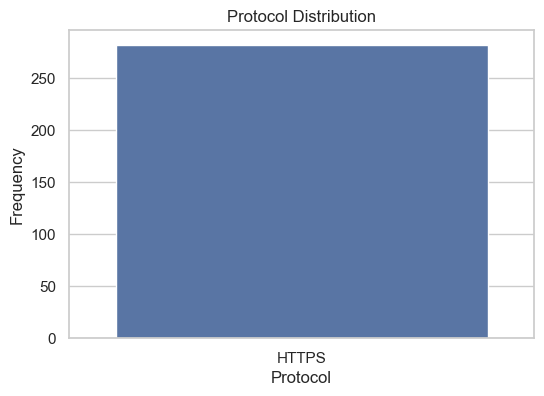

In [30]:
# Count of each protocol
protocol_counts = df['protocol'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.title("Protocol Distribution")
plt.xlabel("Protocol")
plt.ylabel("Frequency")
plt.show()


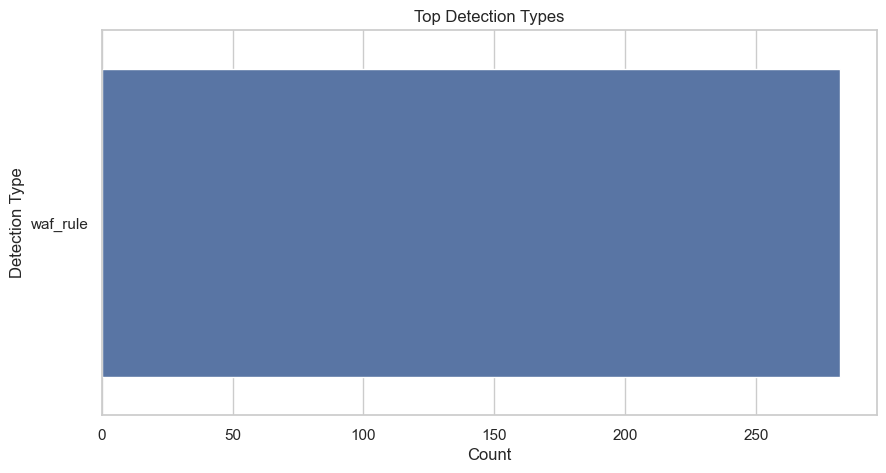

In [31]:
# Split comma-separated values and explode
df_exploded = df['detection_types'].dropna().str.split(',').explode()
detection_counts = df_exploded.value_counts().head(15)

plt.figure(figsize=(10, 5))
sns.barplot(y=detection_counts.index, x=detection_counts.values)
plt.title("Top Detection Types")
plt.xlabel("Count")
plt.ylabel("Detection Type")
plt.show()


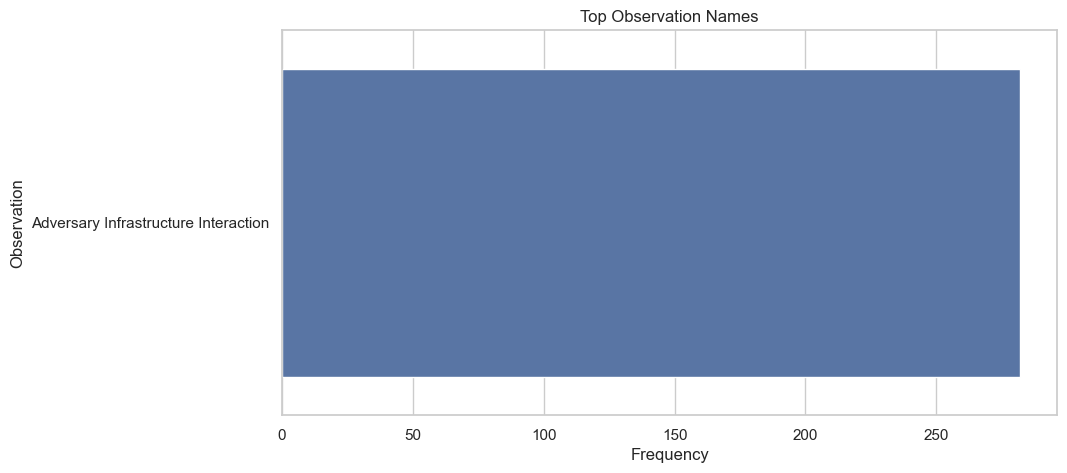

In [32]:
obs_counts = df['observation_name'].value_counts().head(15)

plt.figure(figsize=(10, 5))
sns.barplot(y=obs_counts.index, x=obs_counts.values)
plt.title("Top Observation Names")
plt.xlabel("Frequency")
plt.ylabel("Observation")
plt.show()


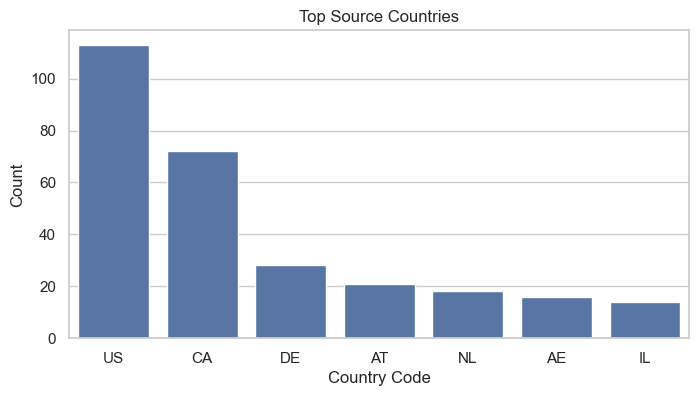

In [33]:
country_counts = df['src_ip_country_code'].value_counts().head(15)

plt.figure(figsize=(8, 4))
sns.barplot(x=country_counts.index, y=country_counts.values)
plt.title("Top Source Countries")
plt.xlabel("Country Code")
plt.ylabel("Count")
plt.show()


In [34]:
'''Important Features
1.)bytes_ratio
2.)bytes_diff
3.)